<a href="https://colab.research.google.com/github/Rafat97/my-tensorflow/blob/image/How_CNN_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is CNN(Convolutional neural network) ?**

**Answer :** Convolutional Neural Network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. It is a mathematical operation which called convolution.

A convolutional neural network consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of convolutional layers that convolve with a multiplication or other dot product. The activation function is commonly a ReLU layer, and is subsequently followed by additional convolutions such as pooling layers, fully connected layers and normalization layers, referred to as hidden layers because their inputs and outputs are masked by the activation function and final convolution. [Source](https://en.wikipedia.org/wiki/Convolutional_neural_network)



# Demo Code of CNN(Convolutional Neural Network)

Import some packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools 
import requests

Download a single image from url 

In [ ]:
pic_url="https://raw.github.com/Rafat97/my-tensorflow/dataset/car_feature.jpg"
with open('car_feature.jpg', 'wb') as handle:
        response = requests.get(pic_url, stream=True)

        if not response.ok:
            print(response)

        for block in response.iter_content(1024):
            print(block)
            if not block:
                break

            handle.write(block)

In [3]:
def show_kernel(kernel, label=True, digits=None, text_size=28):

    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    
    if label:
        for i, j in itertools.product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, 
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

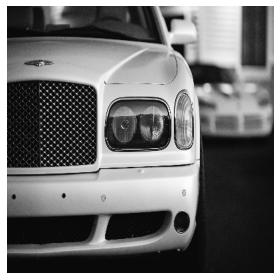

In [4]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = 'car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

Create a kernel for cnn

<tf.Tensor: shape=(3, 3, 1, 1), dtype=float32, numpy=
array([[[[-1.]],

        [[-1.]],

        [[-1.]]],


       [[[-1.]],

        [[ 8.]],

        [[-1.]]],


       [[[-1.]],

        [[-1.]],

        [[-1.]]]], dtype=float32)>

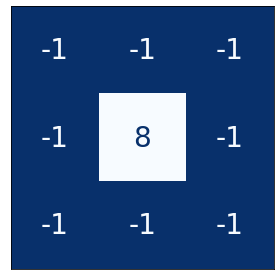

In [5]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])
show_kernel(kernel)
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image= tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1,1])
kernel = tf.cast(kernel, dtype=tf.float32)
kernel

Applying the CNN layer 

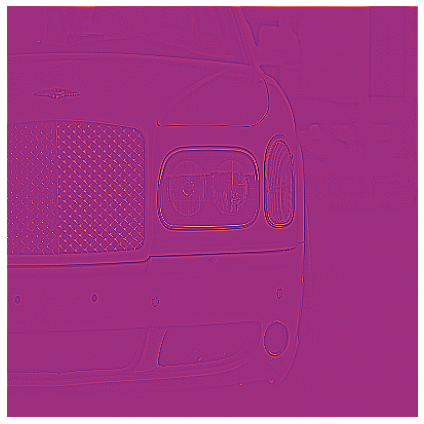

<tf.Tensor: shape=(1, 400, 400, 1), dtype=float32, numpy=
array([[[[ 173.8302   ],
         [  98.50168  ],
         [  98.08298  ],
         ...,
         [ 420.83572  ],
         [ 429.8526   ],
         [ 739.42957  ]],

        [[  78.08656  ],
         [   3.1101093],
         [  17.80798  ],
         ...,
         [ -30.421509 ],
         [   0.9279785],
         [ 417.7687   ]],

        [[  87.960144 ],
         [   7.5023804],
         [ -37.01529  ],
         ...,
         [-138.26534  ],
         [  68.341324 ],
         [ 433.86694  ]],

        ...,

        [[  81.       ],
         [   0.       ],
         [   0.       ],
         ...,
         [  16.557915 ],
         [  -3.8686523],
         [  98.08984  ]],

        [[  81.       ],
         [   0.       ],
         [   0.       ],
         ...,
         [  -6.034851 ],
         [ -10.910156 ],
         [  97.08984  ]],

        [[ 135.       ],
         [  81.       ],
         [  81.       ],
         ...,
         

In [6]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

image_filter

Applying the ReLU activation

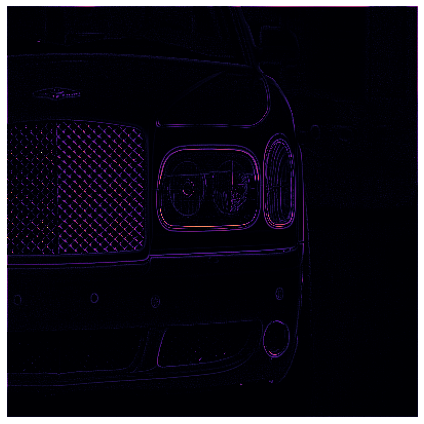

<tf.Tensor: shape=(1, 400, 400, 1), dtype=float32, numpy=
array([[[[173.8302   ],
         [ 98.50168  ],
         [ 98.08298  ],
         ...,
         [420.83572  ],
         [429.8526   ],
         [739.42957  ]],

        [[ 78.08656  ],
         [  3.1101093],
         [ 17.80798  ],
         ...,
         [  0.       ],
         [  0.9279785],
         [417.7687   ]],

        [[ 87.960144 ],
         [  7.5023804],
         [  0.       ],
         ...,
         [  0.       ],
         [ 68.341324 ],
         [433.86694  ]],

        ...,

        [[ 81.       ],
         [  0.       ],
         [  0.       ],
         ...,
         [ 16.557915 ],
         [  0.       ],
         [ 98.08984  ]],

        [[ 81.       ],
         [  0.       ],
         [  0.       ],
         ...,
         [  0.       ],
         [  0.       ],
         [ 97.08984  ]],

        [[135.       ],
         [ 81.       ],
         [ 81.       ],
         ...,
         [ 80.94238  ],
         [ 81.8501

In [7]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

# image_filter
image_detect